# Differences between fitting a sincgauss model and two sinc lines

When fitting an unresolved expanding shell both model can be used but we will show that it is generally better to fit the real model : i.e. a model with two sinc lines.

* The broadening measured with a sincgauss line is overestimated by more than 10% when the it is larger than 0.3 times the fwhm (i.e. the resolution)

* The sincgauss model is slow to compute (around 10 times slower than a sinc model, i.e. 5 times slower than a model based on two sinc lines) 

![M57 sketch](./images/m57_sketch.png)

In [1]:
%matplotlib inline
import orb.utils.spectrum
import pylab as pl
import orb.fit
import numpy as np

## Difference wrt to sigma/fwhm ratio
The `fwhm` is fixed by the resolution. `sigma` is the expansion velocity. The ratio `sigma/fwhm` is the ratio of the broadening wrt the resolution. We will show that, at small ratios (`sigma < 0.3 * fwhm`), it is equal to the broadening of the `sincgauss` model = the width of the `gaussian` which is convolved to the `sinc`. But when the expansion velocity is too high it becomes different.

The following toy model `sinc1d_2` is constructed with two `sinc` lines of equal amplitude.

In [2]:
def sinc1d_2(x, h, a, dx, fwhm, sigma):
    return (orb.utils.spectrum.sinc1d(x, h, a/2., dx + sigma, fwhm)
            + orb.utils.spectrum.sinc1d(x, h, a/2., dx - sigma, fwhm))


In [3]:
# model parameters
x = np.arange(1000)
h = 0
a = 1
dx = np.size(x) / 2
fwhm = 60
sigma = 0.1 * fwhm

We will now model our unresolved emission lines with the toy model and fit a `sincgauss` model over it. The title of each graph gives the real `sigma/fwhm` ratio (in terms of channels size remember that the FWHM is around 1.5 channels with SITELLE).

/home/thomas/Astro/Python/ORB/Orb/orb/fit.py:142: UserWarning: No SNR guess given. Fit mode is classic.
  warnings.warn('No SNR guess given. Fit mode is classic.')


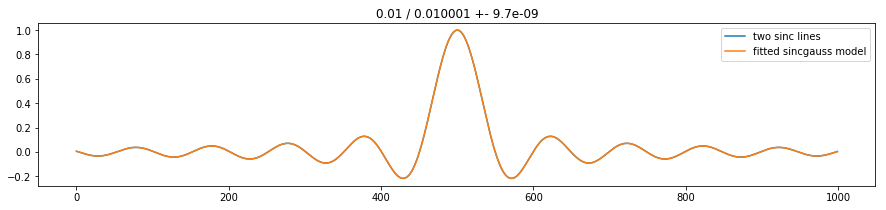

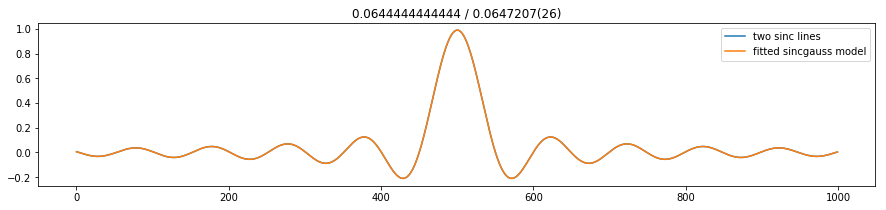

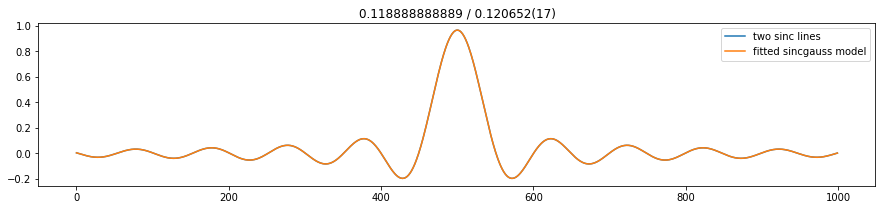

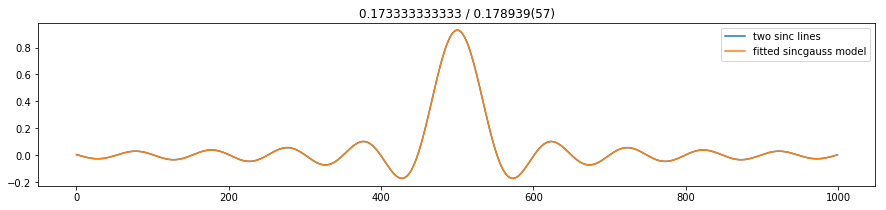

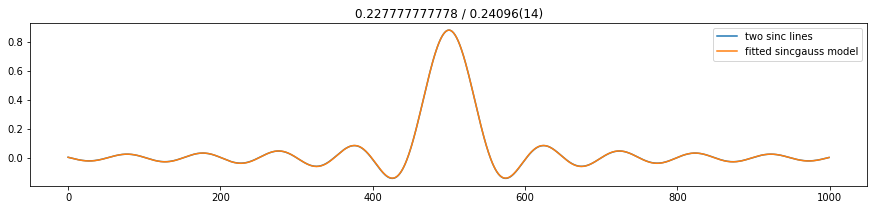

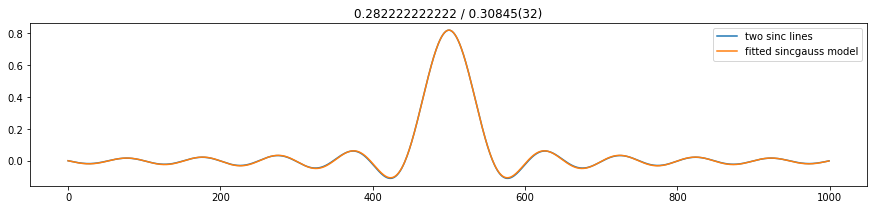

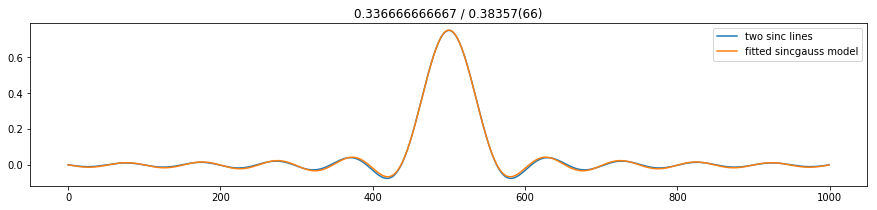

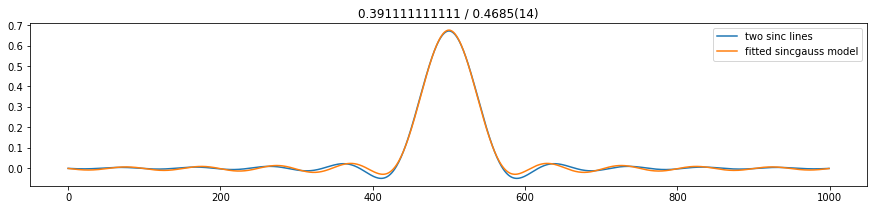

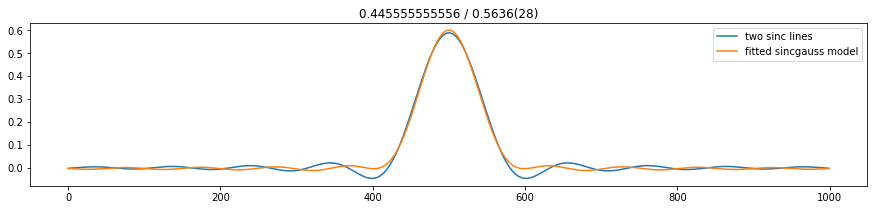

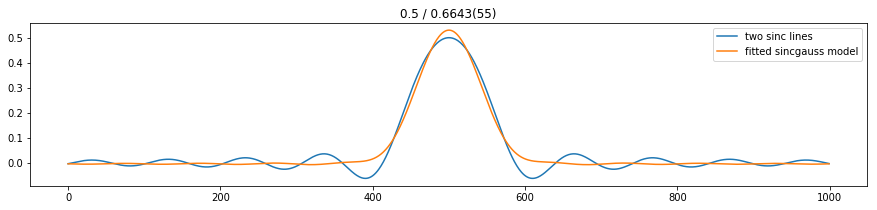

In [4]:
for isig in np.linspace(0.01, 0.5, 10):
    sd = sinc1d_2(x, h, a, dx, fwhm, isig * fwhm)
    fit = orb.fit.fit_lines_in_vector(sd, [dx], fwhm, fmodel='sincgauss',
                                      sigma_guess=isig*fwhm)
    pl.figure(figsize=(15,3))
    pl.plot(sd, label='two sinc lines')
    pl.plot(fit['fitted_vector'], label='fitted sincgauss model')
    pl.legend()
    pl.title('{} / {}'.format(isig, fit['lines_params_gvar'][0,-1]/ fwhm))

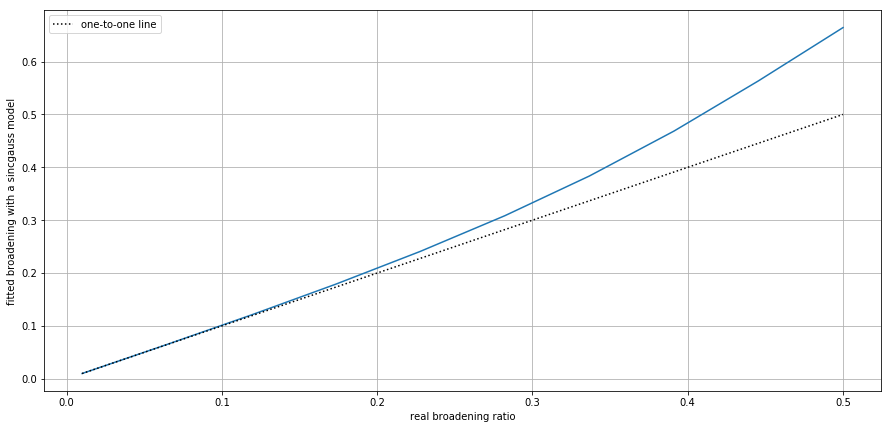

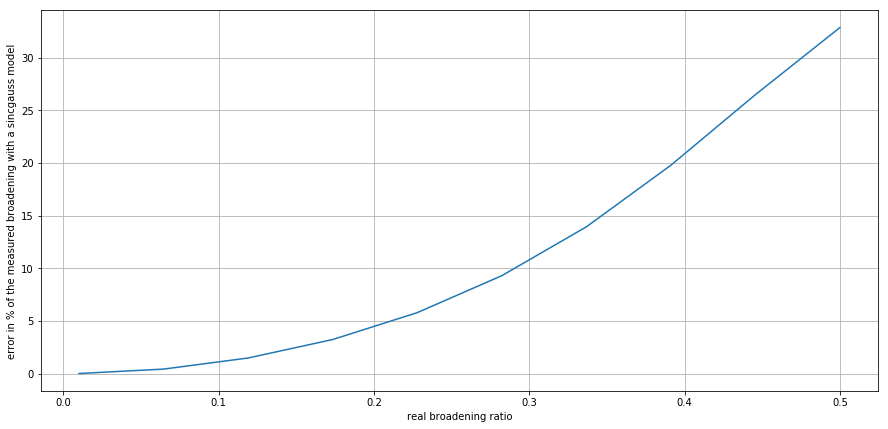

In [6]:
real_ratios = list()
fitted_ratios = list()
for isig in np.linspace(0.01, 0.5, 10):
    sd = sinc1d_2(x, h, a, dx, fwhm, isig * fwhm)
    fit = orb.fit.fit_lines_in_vector(sd, [dx], fwhm, fmodel='sincgauss',
                                      sigma_guess=isig*fwhm)
    real_ratios.append(isig)
    fitted_ratios.append(fit['lines_params'][0,-1]/ fwhm)
real_ratios = np.array(real_ratios)
fitted_ratios = np.array(fitted_ratios)

pl.figure(figsize=(15,7))
pl.plot(real_ratios, fitted_ratios)
pl.plot(real_ratios, real_ratios, c='0.', ls=':', label='one-to-one line')
pl.xlabel('real broadening ratio')
pl.ylabel('fitted broadening with a sincgauss model')
pl.legend()
pl.grid()

pl.figure(figsize=(15,7))
pl.plot(real_ratios, (fitted_ratios-real_ratios)/real_ratios * 100)
pl.xlabel('real broadening ratio')
pl.ylabel('error in % of the measured broadening with a sincgauss model')
pl.grid()